In [ ]:
from tensorboard.backend.event_processing import event_accumulator
import os, glob
import pandas as pd

t_ppo1= "./room/ppo1/training/"
e_ppo1 = "./room/ppo1/eval/"
t_ppo2= "./room/ppo2/training/"
e_ppo2 = "./room/ppo2/eval/"


t_dqn1= "./room/dqn1/training/"
e_dqn1 = "./room/dqn1/eval/"
t_dqn2= "./room/dqn2/training/"
e_dqn2 = "./room/dqn2/eval/"


In [65]:

def dqn_eval(path):
    event_file = [f for f in os.listdir(path) if "tfevents" in f][0]
    event_path = os.path.join(path, event_file)

    ea = event_accumulator.EventAccumulator(event_path)
    ea.Reload()  

    print("Available metrics:", ea.Tags()["scalars"])

    rewards = ea.Scalars("eval/episode_reward") 
    q_values = ea.Scalars("eval/mean_q_value")    
    td_errors = ea.Scalars("eval/td_error")
    episode_length = ea.Scalars("eval/episode_length")

    data = {
        "step": [x.step for x in rewards],
        "reward": [x.value for x in rewards],
        "q_value": [x.value for x in q_values],
        "td_value": [x.value for x in td_errors],
        "episode_length": [x.value for x in episode_length],
    }
    df = pd.DataFrame(data)
    # df.to_csv(f"./room/batch{BATCH}/dqn_test.csv")

    return df

def dqn_train(path):
    event_file = [f for f in os.listdir(path) if "tfevents" in f][0]
    event_path = os.path.join(path, event_file)

    ea = event_accumulator.EventAccumulator(event_path)
    ea.Reload()
    exploration_rate = ea.Scalars("rollout/exploration_rate")
    episode_length = ea.Scalars("rollout/ep_len_mean")
    rewards = ea.Scalars("rollout/ep_rew_mean") 
    
    loss = ea.Scalars("train/loss")    
    learning_rate = ea.Scalars("train/learning_rate")
    
    data_train = {
        "step": [x.step for x in loss], 
        "loss": [x.value for x in loss],
        "learning_rate_value": [x.value for x in learning_rate],
    }
    data_rollout = {
        "step": [x.step for x in rewards], 
        "reward": [x.value for x in rewards],
        "episode_length": [x.value for x in episode_length],
        "exploration_rate": [x.value for x in exploration_rate],
    }
    df_t = pd.DataFrame(data_train)
    df_r = pd.DataFrame(data_rollout)
    # df_r.to_csv(f"./room/batch{BATCH}/dqn_rollout.csv")
    # df_t.to_csv(f"./room/batch{BATCH}/dqn_train.csv")

    return df_t, df_r



In [ ]:
# %reload_ext tensorboard
# %tensorboard --logdir ./room/

Reusing TensorBoard on port 6008 (pid 17668), started 0:17:10 ago. (Use '!kill 17668' to kill it.)

In [66]:

def ppo_eval(path):
    event_file = [f for f in os.listdir(path) if "tfevents" in f][0]
    event_path = os.path.join(path, event_file)
    ea = event_accumulator.EventAccumulator(event_path)
    ea.Reload()  
    print("Available metrics:", ea.Tags()["scalars"])
    rewards = ea.Scalars("eval/episode_reward") 
    value_mean = ea.Scalars("eval/value_mean")    
    entropy = ea.Scalars("eval/entropy")
    episode_length = ea.Scalars("eval/episode_length")
    data = {
        "step": [x.step for x in rewards],
        "reward": [x.value for x in rewards],
        "value_mean": [x.value for x in value_mean],
        "entropy": [x.value for x in entropy],
        "episode_length": [x.value for x in episode_length],
    }
    df = pd.DataFrame(data)
    # df.to_csv(f"./room/batch{BATCH}/ppo_test.csv")
    return df

def ppo_train(path):
    event_file = [f for f in os.listdir(path) if "tfevents" in f][0]
    event_path = os.path.join(path, event_file)

    ea = event_accumulator.EventAccumulator(event_path)
    ea.Reload()
    episode_length = ea.Scalars("rollout/ep_len_mean")
    rewards = ea.Scalars("rollout/ep_rew_mean") 
    
    approx_kl = ea.Scalars("train/approx_kl")    
    clip_fraction = ea.Scalars("train/clip_fraction")
    loss = ea.Scalars("train/loss")    
    clip_range = ea.Scalars("train/clip_range")
    learning_rate = ea.Scalars("train/learning_rate")    
    explained_variance = ea.Scalars("train/explained_variance")
    entropy_loss = ea.Scalars("train/entropy_loss")    
    loss = ea.Scalars("train/loss")
    policy_gradient_loss = ea.Scalars("train/policy_gradient_loss")    
    value_loss = ea.Scalars("train/value_loss")
    
    data_train = {
        "step": [x.step for x in loss], 
        "loss": [x.value for x in loss],
        "learning_rate": [x.value for x in learning_rate],
        "approx_kl": [x.value for x in approx_kl],
        "clip_fraction": [x.value for x in clip_fraction],
        "clip_range": [x.value for x in clip_range],
        "explained_variance": [x.value for x in explained_variance],
        "entropy_loss": [x.value for x in entropy_loss],
        "policy_gradient_loss": [x.value for x in policy_gradient_loss],
        "value_loss": [x.value for x in value_loss],
    }
    data_rollout = {
        "step": [x.step for x in rewards], 
        "reward": [x.value for x in rewards],
        "episode_length": [x.value for x in episode_length],
    }
    df_t = pd.DataFrame(data_train)
    df_r = pd.DataFrame(data_rollout)
    # df_r.to_csv(f"./room/batch{BATCH}/ppo_rollout.csv")
    # df_t.to_csv(f"./room/batch{BATCH}/ppo_train.csv")
    return df_t, df_r



Available metrics: ['eval/episode_reward', 'eval/mean_q_value', 'eval/td_error', 'eval/episode_length']
Available metrics: ['eval/episode_reward', 'eval/mean_q_value', 'eval/td_error', 'eval/episode_length']
Available metrics: ['eval/episode_reward', 'eval/value_mean', 'eval/entropy', 'eval/episode_length']
Available metrics: ['eval/episode_reward', 'eval/value_mean', 'eval/entropy', 'eval/episode_length']


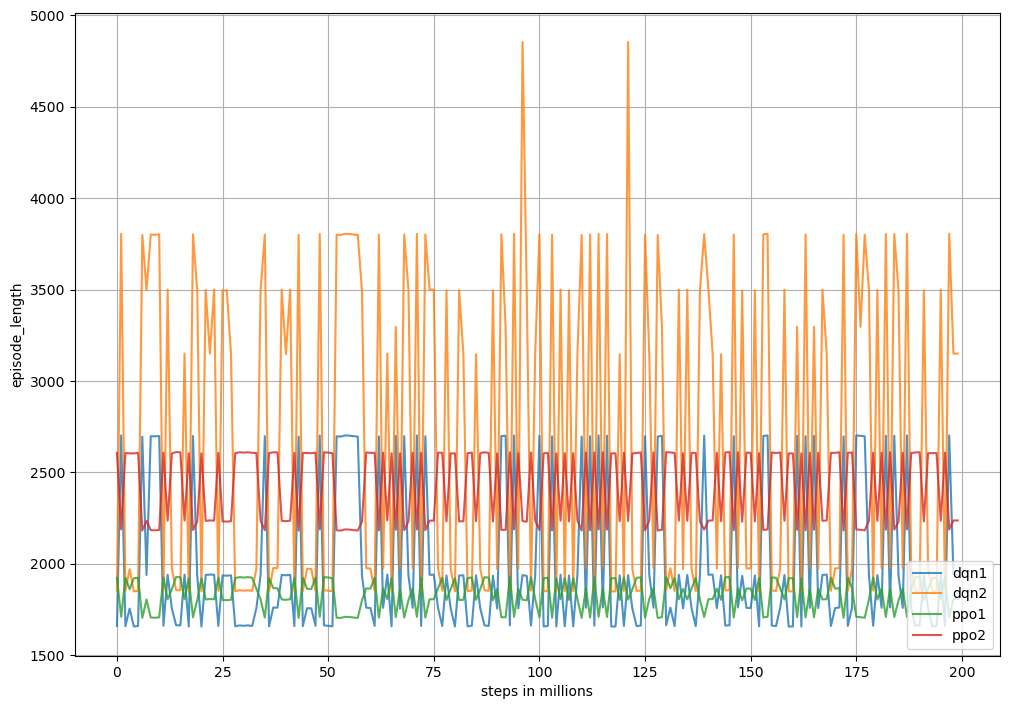

In [70]:
import matplotlib.pyplot as plt


def plot(df1, df2, target, name, _type, phase, l1, l2):
    plt.figure(figsize=(10, 7))
    plt.plot(df1['step'], df1[f'{target}'], 
        label=f'{l1}',
        linestyle='-', 
        color='tab:blue', 
        alpha=0.8)
    plt.plot(df2['step'], df2[f'{target}'], 
        label=f'{l2}',
        linestyle='-', 
        color='tab:orange', 
        alpha=0.8)
    plt.grid(True)
    plt.tight_layout()
    plt.title(f'{phase} phase')
    plt.xlabel(f"{_type}")
    plt.ylabel(f"{target}")
    plt.legend(loc='lower right', fontsize=10)
    plt.savefig(f'{name}.png', format='png')
    plt.show()

def plot4(df1, df2, df3, df4, target, name, _type, phase, l1, l2, l3, l4):
    plt.figure(figsize=(10, 7))
    plt.plot(df1['step'], df1[f'{target}'], 
        label=f'{l1}',
        linestyle='-', 
        color='tab:blue', 
        alpha=0.8)
    plt.plot(df2['step'], df2[f'{target}'], 
        label=f'{l2}',
        linestyle='-', 
        color='tab:orange', 
        alpha=0.8)
    plt.plot(df3['step'], df3[f'{target}'], 
        label=f'{l3}',
        linestyle='-', 
        color='tab:green', 
        alpha=0.8)
    plt.plot(df4['step'], df4[f'{target}'], 
        label=f'{l4}',
        linestyle='-', 
        color='tab:red', 
        alpha=0.8)
    plt.grid(True)
    plt.tight_layout()
    # plt.title(f'{phase} phase')
    plt.xlabel(f"{_type}")
    plt.ylabel(f"{target}")
    plt.legend(loc='lower right', fontsize=10)
    plt.savefig(f'{name}.png', format='png')
    plt.show()

df_train_dqn1_t, df_train_dqn1_r = dqn_train(t_dqn1)
df_eval_dqn1 = dqn_eval(e_dqn1)
df_train_dqn2_t, df_train_dqn2_r = dqn_train(t_dqn2)
df_eval_dqn2 = dqn_eval(e_dqn2)

df_train_ppo1_t, df_train_ppo1_r = ppo_train(t_ppo1)
df_eval_ppo1 = ppo_eval(e_ppo1)

df_train_ppo2_t, df_train_ppo2_r = ppo_train(t_ppo2)
df_eval_ppo2 = ppo_eval(e_ppo2)

# plot(df_train_dqn1_r, df_train_dqn2_r, "reward", "dqn1_dqn2_reward_train", "steps in millions", "train", "dqn1", "dqn2")
# plot4(df_train_dqn1_r, df_train_dqn2_r, df_train_ppo1_r, df_train_ppo2_r, "reward", "reward_train", "steps in millions", "train", "dqn1", "dqn2", "ppo1", "ppo2")

# plot4(df_eval_dqn1, df_eval_dqn2, df_eval_ppo1, df_eval_ppo2, "reward", "reward_test", "episode", "test", "dqn1", "dqn2", "ppo1", "ppo2")
# plot(df_eval_dqn1, df_eval_dqn2, "q_value", "q_value_test", "episode", "test", "dqn1", "dqn2")
# plot4(df_train_dqn1_t, df_train_dqn2_t, df_train_ppo1_t, df_train_ppo2_t, "loss", "loss_train", "steps in millions", "train", "dqn1", "dqn2", "ppo1", "ppo2")
# plot4(df_train_dqn1_r, df_train_dqn2_r, df_train_ppo1_r, df_train_ppo2_r, "episode_length", "ep_len_train", "steps in millions", "train", "dqn1", "dqn2", "ppo1", "ppo2")
plot4(df_eval_dqn1, df_eval_dqn2, df_eval_ppo1, df_eval_ppo2, "episode_length", "ep_len_test", "steps in millions", "test", "dqn1", "dqn2", "ppo1", "ppo2")




## Evaluation 

In [60]:
print("dqn1")
column_means = df_eval_dqn1.mean()
print(column_means)

print("\ndqn2")
column_means = df_eval_dqn2.mean()
print(column_means)

print("\nppo1")
column_means = df_eval_ppo1.mean()
print(column_means)

print("\nppo2")
column_means = df_eval_ppo2.mean()
print(column_means)


dqn1
step                99.500000
reward              18.825000
q_value              1.359084
td_value             0.045934
episode_length    1994.235000
dtype: float64

dqn2
step                99.500000
reward              16.145000
q_value              1.194310
td_value             0.043987
episode_length    2724.110000
dtype: float64

ppo1
step                99.500000
reward              20.745000
value_mean           1.078882
entropy              1.062930
episode_length    1830.775000
dtype: float64

ppo2
step                99.500000
reward              19.765000
value_mean           0.759131
entropy              0.756522
episode_length    2412.785000
dtype: float64


## rollout 

In [ ]:
column_means = df_train_dqn1_r.mean()
print(column_means)

print("\n")
column_means = df_train_dqn2_r.mean()
print(column_means)

print("\n PPO-1")
column_means = df_train_ppo1_r.mean()
print(column_means)

print("\n PPO-2")
column_means = df_train_ppo2_r.mean()
print(column_means)

step                1.901488e+06
reward             -1.181452e+01
episode_lengt       7.964647e+03
exploration_rate    1.168839e-01
dtype: float64


step                2.535790e+06
reward              8.917628e+00
episode_lengt       7.679545e+03
exploration_rate    1.033674e-01
dtype: float64


step              2.503680e+06
reward            8.022951e+00
episode_length    1.025322e+04
dtype: float64


step              2.503680e+06
reward            1.254670e+01
episode_length    8.238948e+03
dtype: float64


## training

In [71]:
column_means = df_train_dqn1_t.mean()
print(column_means)

print("\n")
column_means = df_train_dqn2_t.mean()
print(column_means)

print("\n PPO-1")
column_means = df_train_ppo1_t.mean()
print(column_means)

print("\n PPO-2")
column_means = df_train_ppo2_t.mean()
print(column_means)

step                   1.978852e+06
loss                   3.463490e-03
learning_rate_value    1.000000e-04
dtype: float64


step                   2.635521e+06
loss                   1.253101e-03
learning_rate_value    2.500000e-04
dtype: float64

 PPO-1
step                    2.503680e+06
loss                   -2.181113e-02
learning_rate           2.500000e-04
approx_kl               6.274907e-03
clip_fraction           1.454348e-01
clip_range              1.000000e-01
explained_variance      8.567849e-01
entropy_loss           -1.111704e+00
policy_gradient_loss   -1.027484e-02
value_loss              2.100904e-02
dtype: float64

 PPO-2
step                    2.503680e+06
loss                   -3.923650e-02
learning_rate           1.000000e-04
approx_kl               1.631909e-02
clip_fraction           2.865601e-01
clip_range              1.000000e-01
explained_variance      9.075750e-01
entropy_loss           -1.080103e+00
policy_gradient_loss   -1.982049e-02
value_loss        